In [2]:
%load_ext autoreload
%autoreload 2

Here we import key libraries used in the notebook (run `uv sync` and select the corresponding kernel if some of them are missing).

In [3]:
# Main libraries
import shap
import numpy as np
import os

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# We will use Polars for data manipulation
import polars as pl
import polars.selectors as cs

# Casting types from time to time to have a better autocompletion
from typing import cast

from models import train_and_explain, ExperimentResults, Species, ModelType, ALL_SPECIES
from analysis import summarize_performance
from config import Ablation, FEATURES_METADATA

import cmocean

CMAP = cmocean.cm.thermal

# Use caching for various results
if not os.path.exists("./cache"):
    os.makedirs("./cache")

We then optimize hyperparameters and train models for every species. We may also select here the type of grouping used by the K-fold validation.

Now configure the model to be used and the grouping column for K-fold validation.

## Feature importance by species

Here we show how feature importance varies by species.

In [4]:
all_results: dict[Species, ExperimentResults] = {}

group_col = "tree_id"  # "tree_id" or "plot_id"
model_type: ModelType = "lgbm"  # "lgbm" or "lasso"
ablation: Ablation = "all"  # "all", "tree-level-only", "plot-level-only", "no-defoliation", "max-defoliation"

for species in ALL_SPECIES:
    all_results[species] = train_and_explain(
        species, model_type=model_type, group_by=group_col, ablation=ablation
    )

summarize_performance(
    all_results, ablation=ablation, model_type=model_type, group_col=group_col
)

2025-12-02 16:38:06 - INFO - Loading cached study for spruce with group_col=tree_id.


Training model for spruce
P-value: 0.00
Starting cross-validation for spruce with lgbm estimator...
Fold 1/5


2025-12-02 16:38:07 - INFO - Loading cached study for spruce with group_col=tree_id.


Fold 1: R2 (train) = 0.57, R2 (test) = 0.51
Fold 2/5


2025-12-02 16:38:08 - INFO - Loading cached study for spruce with group_col=tree_id.


Fold 2: R2 (train) = 0.58, R2 (test) = 0.51
Fold 3/5


2025-12-02 16:38:08 - INFO - Loading cached study for spruce with group_col=tree_id.


Fold 3: R2 (train) = 0.58, R2 (test) = 0.49
Fold 4/5


2025-12-02 16:38:09 - INFO - Loading cached study for spruce with group_col=tree_id.


Fold 4: R2 (train) = 0.58, R2 (test) = 0.49
Fold 5/5
Fold 5: R2 (train) = 0.58, R2 (test) = 0.50
Cross-validation completed for spruce with lgbm estimator.
Summary of results:
 `- R2 (test): 0.50 +/- 0.01
 `- R2 (train): 0.58 +/- 0.00


2025-12-02 16:38:29 - INFO - Loading cached study for pine with group_col=tree_id.


Training model for pine
P-value: 0.00
Starting cross-validation for pine with lgbm estimator...
Fold 1/5


2025-12-02 16:38:30 - INFO - Loading cached study for pine with group_col=tree_id.


Fold 1: R2 (train) = 0.50, R2 (test) = 0.44
Fold 2/5


2025-12-02 16:38:30 - INFO - Loading cached study for pine with group_col=tree_id.


Fold 2: R2 (train) = 0.50, R2 (test) = 0.44
Fold 3/5


2025-12-02 16:38:31 - INFO - Loading cached study for pine with group_col=tree_id.


Fold 3: R2 (train) = 0.51, R2 (test) = 0.40
Fold 4/5


2025-12-02 16:38:31 - INFO - Loading cached study for pine with group_col=tree_id.


Fold 4: R2 (train) = 0.50, R2 (test) = 0.43
Fold 5/5
Fold 5: R2 (train) = 0.50, R2 (test) = 0.44
Cross-validation completed for pine with lgbm estimator.
Summary of results:
 `- R2 (test): 0.43 +/- 0.02
 `- R2 (train): 0.50 +/- 0.00


2025-12-02 16:38:34 - INFO - Loading cached study for beech with group_col=tree_id.


Training model for beech
P-value: 0.00
Starting cross-validation for beech with lgbm estimator...
Fold 1/5


2025-12-02 16:38:35 - INFO - Loading cached study for beech with group_col=tree_id.


Fold 1: R2 (train) = 0.51, R2 (test) = 0.45
Fold 2/5


2025-12-02 16:38:35 - INFO - Loading cached study for beech with group_col=tree_id.


Fold 2: R2 (train) = 0.50, R2 (test) = 0.47
Fold 3/5


2025-12-02 16:38:36 - INFO - Loading cached study for beech with group_col=tree_id.


Fold 3: R2 (train) = 0.51, R2 (test) = 0.46
Fold 4/5


2025-12-02 16:38:36 - INFO - Loading cached study for beech with group_col=tree_id.


Fold 4: R2 (train) = 0.51, R2 (test) = 0.43
Fold 5/5
Fold 5: R2 (train) = 0.51, R2 (test) = 0.45
Cross-validation completed for beech with lgbm estimator.
Summary of results:
 `- R2 (test): 0.45 +/- 0.01
 `- R2 (train): 0.51 +/- 0.00


2025-12-02 16:38:39 - INFO - Loading cached study for oak with group_col=tree_id.


Training model for oak
P-value: 0.01
Starting cross-validation for oak with lgbm estimator...
Fold 1/5


2025-12-02 16:38:39 - INFO - Loading cached study for oak with group_col=tree_id.


Fold 1: R2 (train) = 0.49, R2 (test) = 0.37
Fold 2/5


2025-12-02 16:38:39 - INFO - Loading cached study for oak with group_col=tree_id.


Fold 2: R2 (train) = 0.51, R2 (test) = 0.31
Fold 3/5


2025-12-02 16:38:40 - INFO - Loading cached study for oak with group_col=tree_id.


Fold 3: R2 (train) = 0.47, R2 (test) = 0.46
Fold 4/5


2025-12-02 16:38:40 - INFO - Loading cached study for oak with group_col=tree_id.


Fold 4: R2 (train) = 0.49, R2 (test) = 0.40
Fold 5/5
Fold 5: R2 (train) = 0.49, R2 (test) = 0.33
Cross-validation completed for oak with lgbm estimator.
Summary of results:
 `- R2 (test): 0.37 +/- 0.05
 `- R2 (train): 0.49 +/- 0.01

Performance summary for group_by='plot_id':
shape: (4, 7)
| ablation        | model | spruce        | pine        | beech        | oak          | mean_r2 |
|-----------------|-------|---------------|-------------|--------------|--------------|---------|
| all             | lasso | 0.06 ± 0.03** | -0.05 ± 0.1 | -0.05 ± 0.19 | -0.74 ± 1.0  | 0.0     |
| tree-level-only | lasso | 0.06 ± 0.06*  | 0.01 ± 0.04 | 0.01 ± 0.04  | -0.07 ± 0.18 | 0.0     |
| all             | lgbm  | 0.14 ± 0.06** | 0.01 ± 0.19 | -0.0 ± 0.24  | -0.11 ± 0.2  | 0.03    |
| tree-level-only | lgbm  | 0.06 ± 0.07   | 0.02 ± 0.07 | -0.01 ± 0.13 | -0.07 ± 0.18 | 0.0     |

Performance summary for group_by='tree_id':
shape: (8, 7)
| ablation        | model | spruce         | pine           | 

/Users/gmermoud/code/simlab/icp-paper/analysis.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  t_statistic = float(r2_value) / standard_error
/Users/gmermoud/code/simlab/icp-paper/analysis.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  t_statistic = float(r2_value) / standard_error


In [5]:
feature_importances = pl.from_dicts(
    [
        {
            "species": species,
            "fold": fold,
            **dict(
                zip(
                    results.features,
                    np.abs(results.shap_values[fold].values).mean(axis=0),
                )
            ),
        }
        for species, results in all_results.items()
        for fold in range(5)
    ]
).unpivot(
    on=cs.exclude("species", "fold"),  # type: ignore
    index=["species", "fold"],
    variable_name="feature",
    value_name="shap",
)

feature_importances.write_parquet(
    f"./cache/feature_importances-{ablation}-{model_type}-{group_col}.parquet",
)

## Plot feature importances

In [26]:
min_importance = 1.0
max_rank = 3

data = (
    feature_importances.with_columns(
        importance=pl.col("shap").mean().over("species", "feature") * 100
    )
    .with_columns(
        rank=pl.col("importance").rank(descending=True, method="dense").over("species"),
    )
    .filter(
        (
            (pl.col("importance").max().over("feature") >= min_importance)
            | (pl.col("rank").min().over("feature") <= max_rank)
        )
    )
    .join(
        pl.from_dicts(
            [
                {"feature": k, "feature_label": v["label"]}
                for k, v in FEATURES_METADATA.items()
            ]
        ),
        on="feature",
        how="left",
    )
    .with_columns(feature=pl.col("feature_label"))
    .drop("feature_label")
    .sort(
        "species", pl.col("importance").mean().over("feature"), descending=[False, True]
    )
)

# Add a summary over all species
data = pl.concat(
    [
        data,
        data.group_by("feature", "fold")
        .agg(
            shap=pl.col("shap").mean(),
            importance=pl.col("importance").mean(),
        )
        .with_columns(species=pl.lit("all species"))
        .with_columns(
            rank=pl.col("importance")
            .rank(descending=True, method="dense")
            .over("species"),
        )
        .select(data.columns),
    ],
    how="vertical_relaxed",
)


with pl.Config() as cfg:
    cfg.set_tbl_formatting("ASCII_FULL")
    cfg.set_tbl_rows(100)

    stats = (
        data.filter(pl.col("species") != "all species")
        .group_by("feature", "species")
        .agg(pl.mean("rank"))
        .sort(by="rank")
        .filter(pl.col("feature") == "Mean defoliation")
    )

    print(stats)

data

shape: (4, 3)
+------------------+---------+------+
| feature          | species | rank |
| ---              | ---     | ---  |
| str              | str     | f64  |
+===================================+
| Mean defoliation | spruce  | 2.0  |
|------------------+---------+------|
| Mean defoliation | oak     | 2.0  |
|------------------+---------+------|
| Mean defoliation | pine    | 3.0  |
|------------------+---------+------|
| Mean defoliation | beech   | 5.0  |
+------------------+---------+------+


species,fold,feature,shap,importance,rank
str,i64,str,f64,f64,u32
"""beech""",4,"""Min. social class""",0.043825,4.608681,1
"""beech""",3,"""Min. social class""",0.047916,4.608681,1
"""beech""",2,"""Min. social class""",0.046312,4.608681,1
"""beech""",1,"""Min. social class""",0.043952,4.608681,1
"""beech""",0,"""Min. social class""",0.048429,4.608681,1
…,…,…,…,…,…
"""all species""",0,"""Mean defoliation""",0.022579,2.228579,2
"""all species""",2,"""S.s. conductivity""",0.00434,0.510531,18
"""all species""",0,"""Median defoliation""",0.008542,1.005242,7


/var/folders/8w/bgtq_bb95_bgd7nxmt9xj04h0000gn/T/ipykernel_24678/1103590606.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_ylabels)


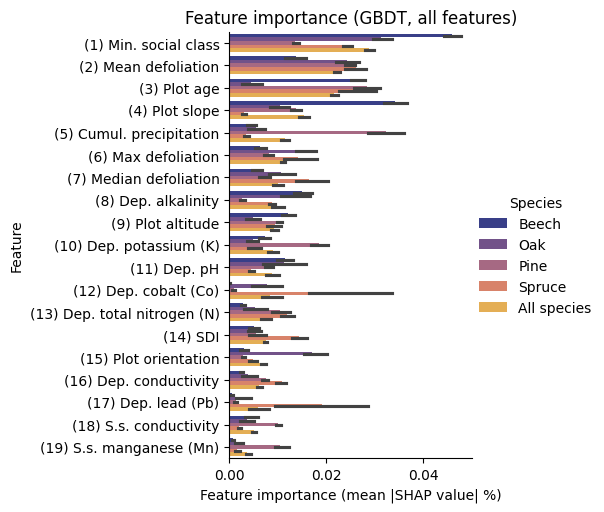

In [28]:
# Plot using seaborn
num_species = len(feature_importances.select("species").unique())
g = sns.catplot(
    data,
    x="shap",
    y="feature",
    hue="species",
    kind="bar",
    palette=sns.color_palette("cmo.thermal", n_colors=num_species + 1),
)

g._legend.set_title("Species")

# Capitalize legend labels
new_labels = [label.get_text().capitalize() for label in g._legend.texts[0:]]
for label, new_text in zip(g._legend.texts[0:], new_labels):
    label.set_text(new_text)

# Prepend rank to each feature name of the y-axis
ax = g.facet_axis(0, 0)
yticks = ax.get_yticks()
ylabels = ax.get_yticklabels()
new_ylabels = []
for ytick, ylabel in zip(yticks, ylabels):
    feature_name = ylabel.get_text()
    rank = int(
        data.group_by("feature", "species")
        .agg(pl.col("rank").mean())
        .filter(
            (pl.col("feature") == feature_name) & (pl.col("species") == "all species")
        )
        .select("rank")
        .item()
    )
    new_ylabels.append(f"({rank}) {feature_name}")
ax.set_yticklabels(new_ylabels)

plt.xlabel("Feature importance (mean |SHAP value| %)")
plt.ylabel("Feature")

model_label = "GBDT" if model_type == "lgbm" else "Lasso"
group_label = "tree identifier" if group_col == "tree_id" else "plot identifier"
ablation_label = "all features" if ablation == "all" else "without defoliation"
plt.title(f"Feature importance ({model_label}, {ablation_label})")

fig = plt.gcf()
plt.savefig(
    f"./figures/importance-{model_type}-{group_col}-{ablation}.pdf",
    bbox_inches="tight",
)

In [29]:
# Variation of feature importance with and without defoliation
top_n = 3

other_ablation = "no-defoliation" if ablation == "all" else "all"

if os.path.exists(
    f"./cache/feature_importances-{other_ablation}-{model_type}-{group_col}.parquet"
):
    importances_comparison = (
        feature_importances.group_by("species", "feature")
        .agg(
            pl.col("shap").mean().alias(f"shap-{ablation}") * 100,
        )
        .with_columns(
            pl.col(f"shap-{ablation}")
            .rank(descending=True)
            .over("species")
            .cast(pl.Int32)
            .alias(f"rank-{ablation}"),
        )
        .join(
            pl.read_parquet(
                f"./cache/feature_importances-{other_ablation}-{model_type}-{group_col}.parquet"
            )
            .group_by("species", "feature")
            .agg(
                pl.col("shap").mean().alias(f"shap-{other_ablation}") * 100,
            )
            .with_columns(
                pl.col(f"shap-{other_ablation}")
                .rank(descending=True)
                .over("species")
                .cast(pl.Int32)
                .alias(f"rank-{other_ablation}"),
            ),
            on=["species", "feature"],
            how="full",
            validate="1:1",
            coalesce=True,
        )
    )

    top_changes = (
        importances_comparison.with_columns(
            shap_delta=pl.col(f"shap-{ablation}") - pl.col(f"shap-{other_ablation}"),
            rank_delta=pl.col(f"rank-{other_ablation}") - pl.col(f"rank-{ablation}"),
        )
        .filter(
            (
                pl.col("shap_delta").rank("dense", descending=True).over("species")
                <= top_n
            )
            & (pl.col(f"rank-{ablation}") <= 10)
        )
        .sort(["species", "shap_delta"], descending=[False, True])
        .select(
            "species",
            "feature",
            f"shap-{ablation}",
            f"shap-{other_ablation}",
            "shap_delta",
            f"rank-{ablation}",
            f"rank-{other_ablation}",
            "rank_delta",
        )
        .filter(
            (
                pl.col("shap_delta").rank("dense", descending=True).over("species")
                <= top_n
            )
            & (pl.col(f"rank-{ablation}") <= 10)
        )
        .sort(["species", "shap_delta"], descending=[False, True])
        .select(
            "species",
            "feature",
            f"shap-{ablation}",
            f"shap-{other_ablation}",
            "shap_delta",
            f"rank-{ablation}",
            f"rank-{other_ablation}",
            "rank_delta",
        )
    )

    with pl.Config() as cfg:
        cfg.set_tbl_formatting("ASCII_MARKDOWN")
        cfg.set_float_precision(1)
        cfg.set_tbl_rows(100)
        cfg.set_tbl_hide_column_data_types(True)

        print(
            top_changes.select(
                "species",
                "feature",
                "rank-all",
                "rank-no-defoliation",
                "shap-all",
                "shap-no-defoliation",
                "shap_delta",
                "rank_delta",
            ).sort(by=["species", "rank-no-defoliation"], descending=[False, False])
        )
        top_changes.write_clipboard(float_precision=3)

shape: (7, 8)
| species | feature     | rank-all | rank-no-def | shap-all | shap-no-de | shap_delta | rank_delta |
|         |             |          | oliation    |          | foliation  |            |            |
|---------|-------------|----------|-------------|----------|------------|------------|------------|
| beech   | soph_avg_ag | 3        | 3           | 2.7      | 1.4        | 1.2        | 0          |
|         | e           |          |             |          |            |            |            |
| beech   | dep_alk     | 4        | 5           | 1.5      | 1.0        | 0.5        | 1          |
| beech   | plot_altitu | 6        | 13          | 1.2      | 0.7        | 0.5        | 7          |
|         | de          |          |             |          |            |            |            |
| oak     | plot_orient | 3        | 8           | 1.7      | 0.8        | 0.9        | 5          |
|         | ation       |          |             |          |            |   

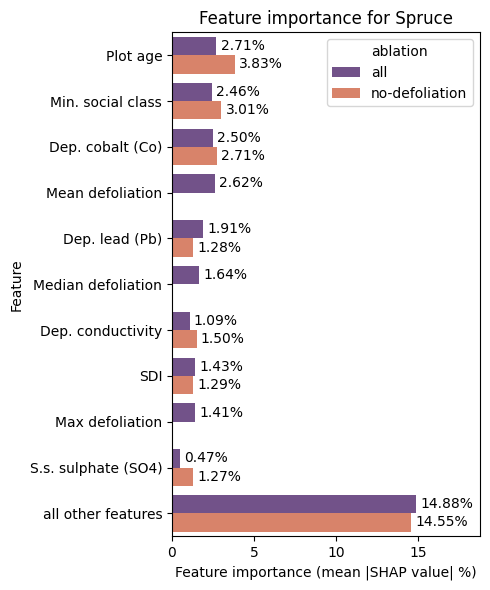

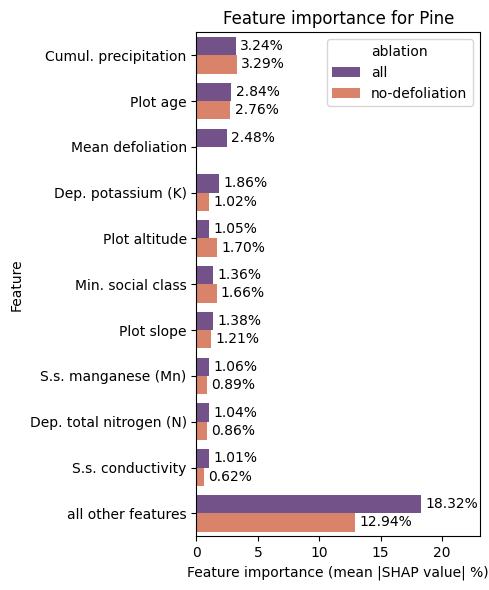

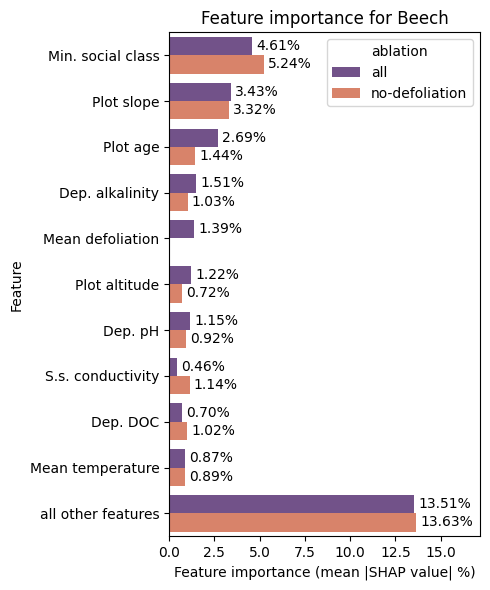

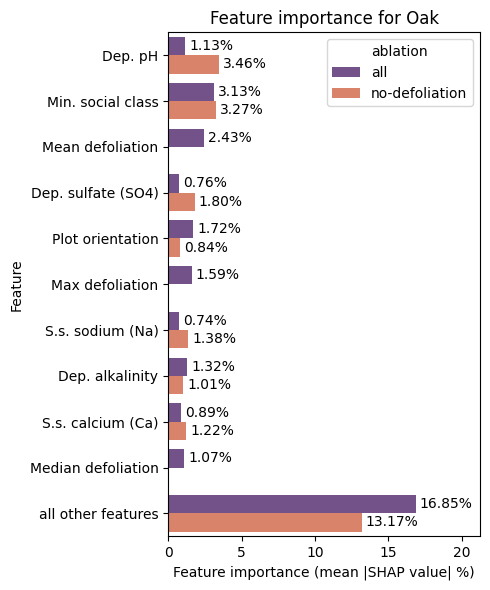

In [30]:
# Plot the top N features by species for a given fold
top_n = 10

for species, results in all_results.items():
    plt.figure(figsize=(5, 6))
    data = (
        importances_comparison.filter(pl.col("species") == species)
        .join(
            pl.from_dicts(
                [
                    {"feature": k, "feature_label": v["label"]}
                    for k, v in FEATURES_METADATA.items()
                ]
            ),
            on="feature",
            how="left",
        )
        .with_columns(feature=pl.col("feature_label"))
        .drop("feature_label")
        .group_by("feature")
        .agg(
            pl.col("shap-all").mean().alias("importance-all"),
            pl.col("shap-no-defoliation").mean().alias("importance-no-defoliation"),
        )
        .with_columns(
            pl.max_horizontal(
                pl.col("importance-all"), pl.col("importance-no-defoliation")
            )
            .rank(descending=True)
            .alias("rank")
        )
    )

    data = (
        data.unpivot(index=["feature", "rank"], on=cs.starts_with("importance-"))
        .with_columns(ablation=pl.col("variable").str.replace("importance-", ""))
        .select("feature", "ablation", pl.col("value").alias("importance"), "rank")
    )

    data = pl.concat(
        [
            data.filter(pl.col("rank") <= top_n)
            .sort(pl.col("rank"))
            .select("feature", "ablation", "importance"),
            data.filter(pl.col("rank") > top_n).select(
                pl.lit("all other features").alias("feature"),
                "ablation",
                pl.col("importance").sum().over("ablation").alias("importance"),
            ),
        ]
    )

    ax = sns.barplot(
        data=data,
        x="importance",
        y="feature",
        hue="ablation",
        palette=sns.color_palette("cmo.thermal", n_colors=2),
    )

    ax.bar_label(ax.containers[0], fontsize=10, fmt="%.2f%%", padding=3)
    ax.bar_label(ax.containers[1], fontsize=10, fmt="%.2f%%", padding=3)

    ax.set_xlabel("Feature importance (mean |SHAP value| %)")
    ax.set_ylabel("Feature")

    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] * 1.2)

    ax.set_title(f"Feature importance for {species.capitalize()}")

    plt.tight_layout()

## Feature dependence plots

These plots show how the Shapley value varies as a function of feature value.

/var/folders/8w/bgtq_bb95_bgd7nxmt9xj04h0000gn/T/ipykernel_24678/4208565020.py:12: RuntimeWarning: invalid value encountered in power
  fit_func=lambda x, a, b, c: a * np.power(x, b) + c,


Text(64.22222222222221, 0.5, 'SHAP value [%]')

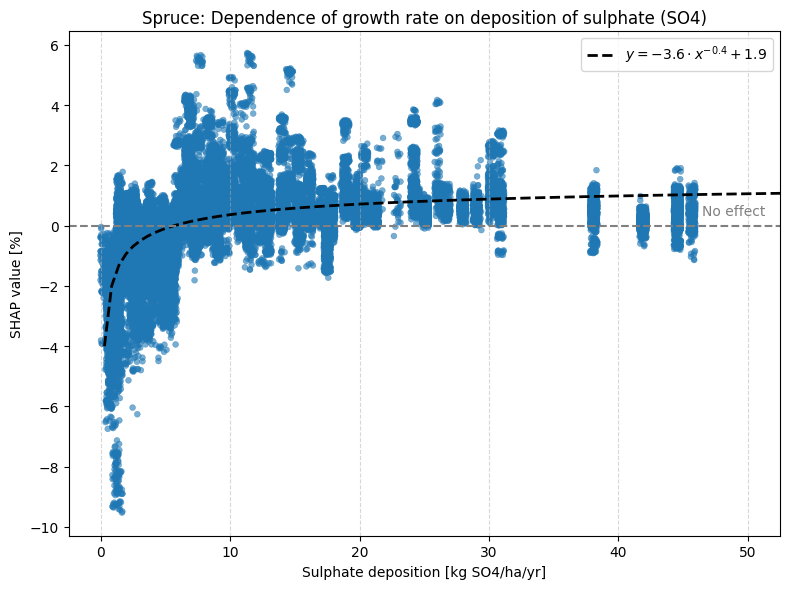

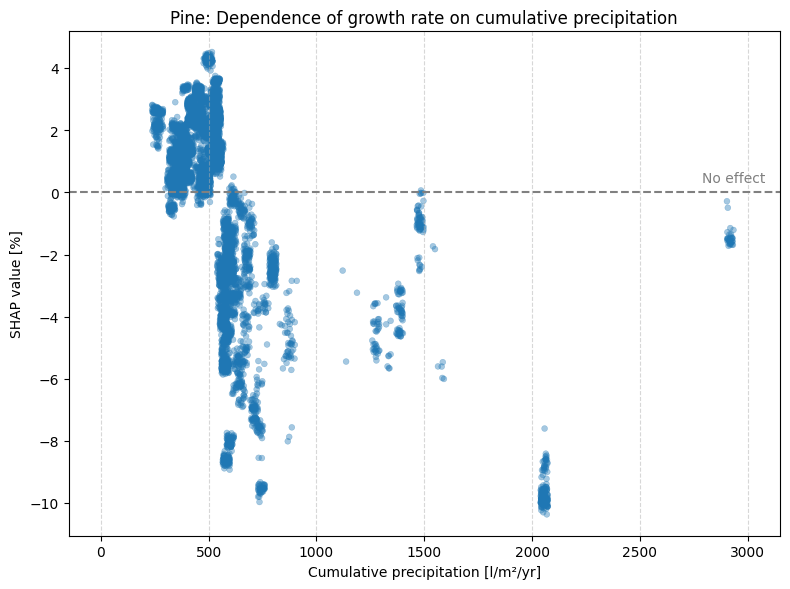

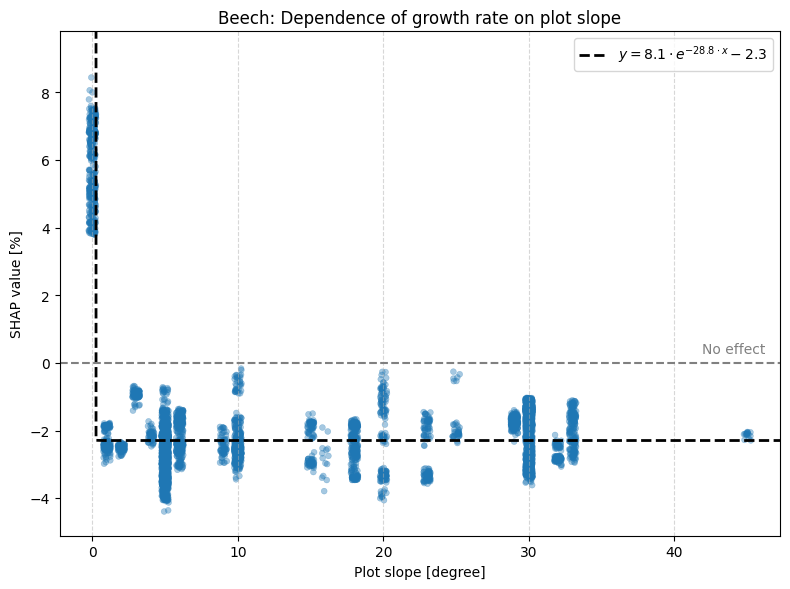

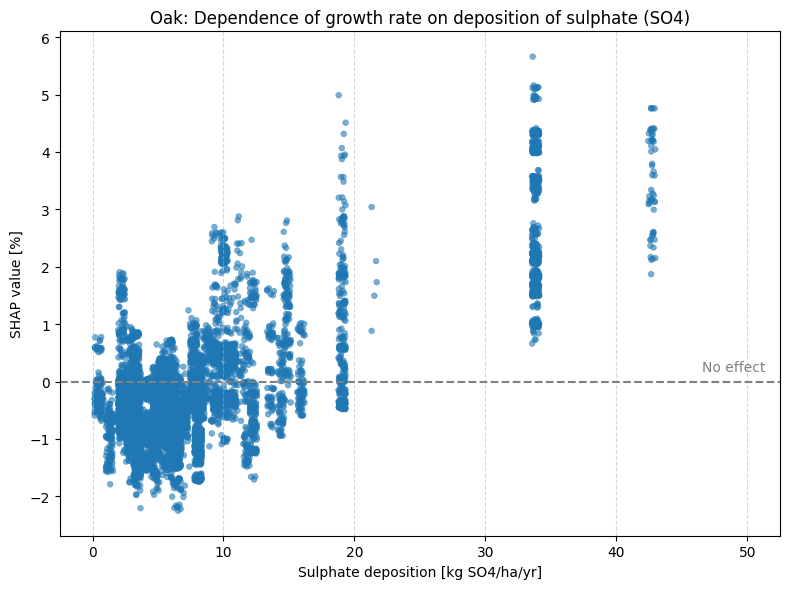

In [31]:
from explain import plot_dependence

# Produce dependence plots for some key (species, feature) pairs
fold = 0  # Change this to plot for a different fold

# Spruce: dependence on deposition of sulphate
ax = plot_dependence(
    all_results["spruce"],
    feature="dep_s_so4",
    xlim=(0, 50),
    # Fit a power-law curve to the data
    fit_func=lambda x, a, b, c: a * np.power(x, b) + c,
    fit_p0=(1, -0.5, 0.0),
    fit_formula="y = {0:.1f} \\cdot x^{{{1:.1f}}} + {2:.1f}",
)
# Set a vertical line at 0.6 mg/l
ax.set_title("Spruce: Dependence of growth rate on deposition of sulphate (SO4)")

ax.set_xlabel("Sulphate deposition [kg SO4/ha/yr]")
ax.set_ylabel("SHAP value [%]")


# Pine: dependence on cumulative precipitation
ax = plot_dependence(
    all_results["pine"],
    feature="yearly_precip",
    fold=fold,
    alpha=0.4,
    xlim=(0, 3000),
    # # # Fit a power-law curve to the data
    # fit_func=lambda x, a, b, c: a * np.power(x, b) + c,
    # fit_formula="y = {0:.1f} \\cdot x^{{{1:.1f}}} + {2:.1f}",
)
ax.set_title("Pine: Dependence of growth rate on cumulative precipitation")
ax.set_xlabel("Cumulative precipitation [l/m²/yr]")
ax.set_ylabel("SHAP value [%]")

# Beech: dependence on plot slope
ax = plot_dependence(
    all_results["beech"],
    feature="plot_slope",
    fold=fold,
    alpha=0.4,
    # Fit an exponential curve to the data
    fit_func=lambda x, a, b, c: a * np.exp(b * x) + c,
    fit_p0=(1, -0.01, 0.0),
    fit_formula="y = {0:.1f} \\cdot e^{{{1:.1f} \\cdot x}} {2:.1f}",
)
ax.set_title("Beech: Dependence of growth rate on plot slope")
ax.set_xlabel("Plot slope [degree]")
ax.set_ylabel("SHAP value [%]")


# Oak: dependence on deposition of sulphate
ax = plot_dependence(all_results["oak"], feature="dep_s_so4", xlim=(0, 50))
ax.set_title("Oak: Dependence of growth rate on deposition of sulphate (SO4)")
ax.set_xlabel("Sulphate deposition [kg SO4/ha/yr]")
ax.set_ylabel("SHAP value [%]")

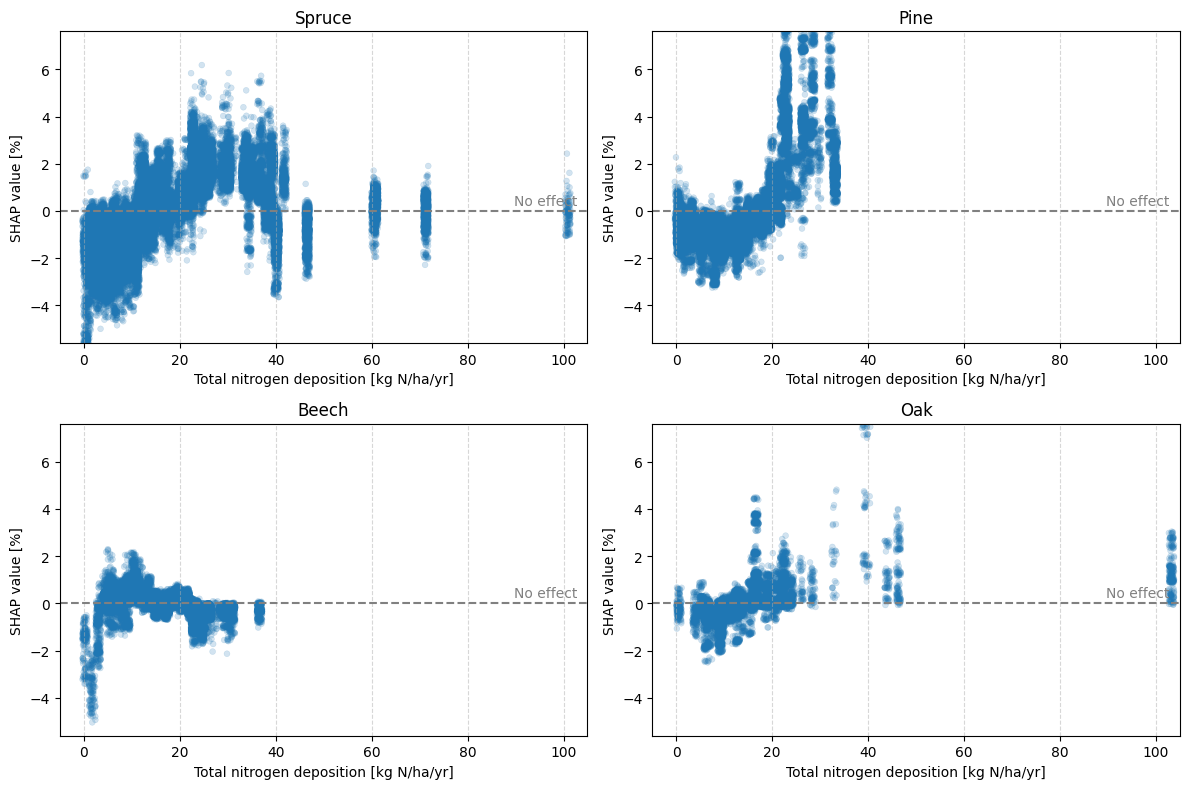

In [32]:
# One plot per species (4 in total)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for species, ax in zip(ALL_SPECIES, axes.flatten()):
    plot_dependence(
        all_results[species],
        feature="dep_n_tot",
        alpha=0.2,
        ax=ax,
        xlim=(0, 100),
        ylim=(-5, 7),
    )

    ax.set_xlabel("Total nitrogen deposition [kg N/ha/yr]")

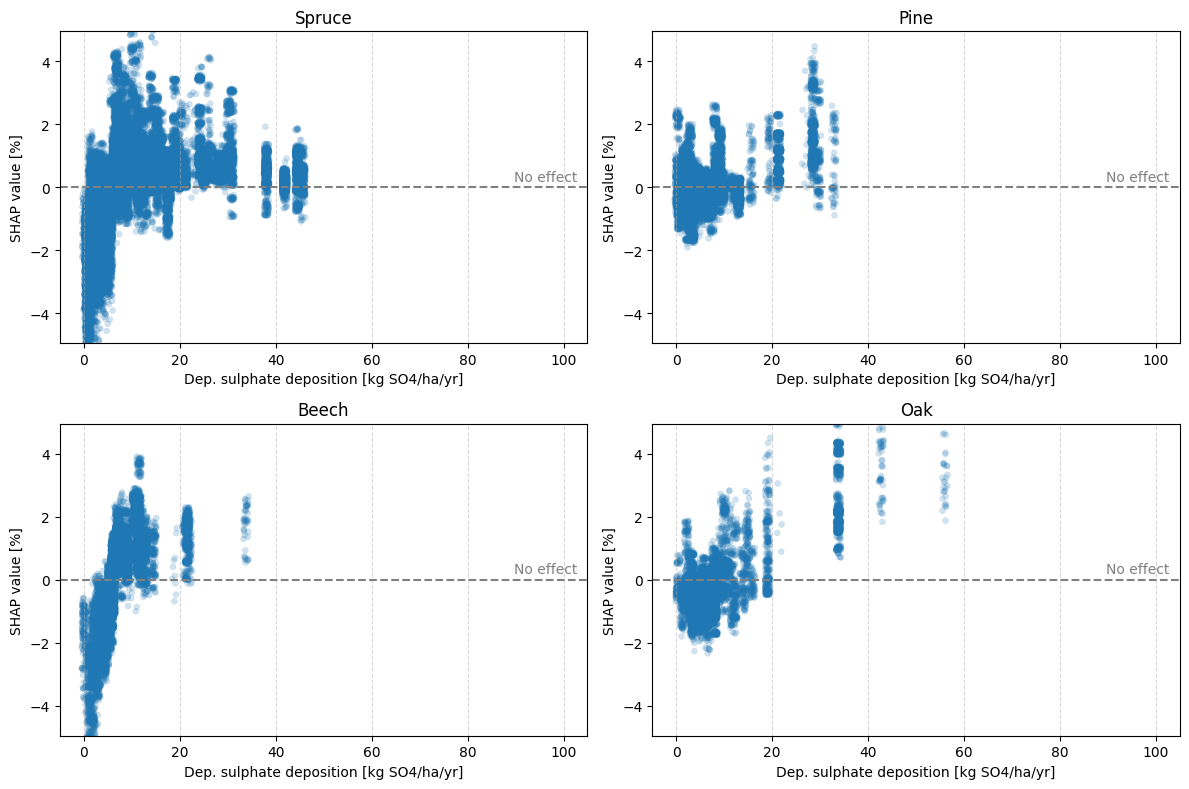

In [33]:
# One plot per species (4 in total)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for species, ax in zip(ALL_SPECIES, axes.flatten()):
    plot_dependence(
        all_results[species],
        feature="dep_s_so4",
        alpha=0.2,
        ax=ax,
        xlim=(0, 100),
        ylim=(-4.5, 4.5),
    )

    ax.set_xlabel("Dep. sulphate deposition [kg SO4/ha/yr]")

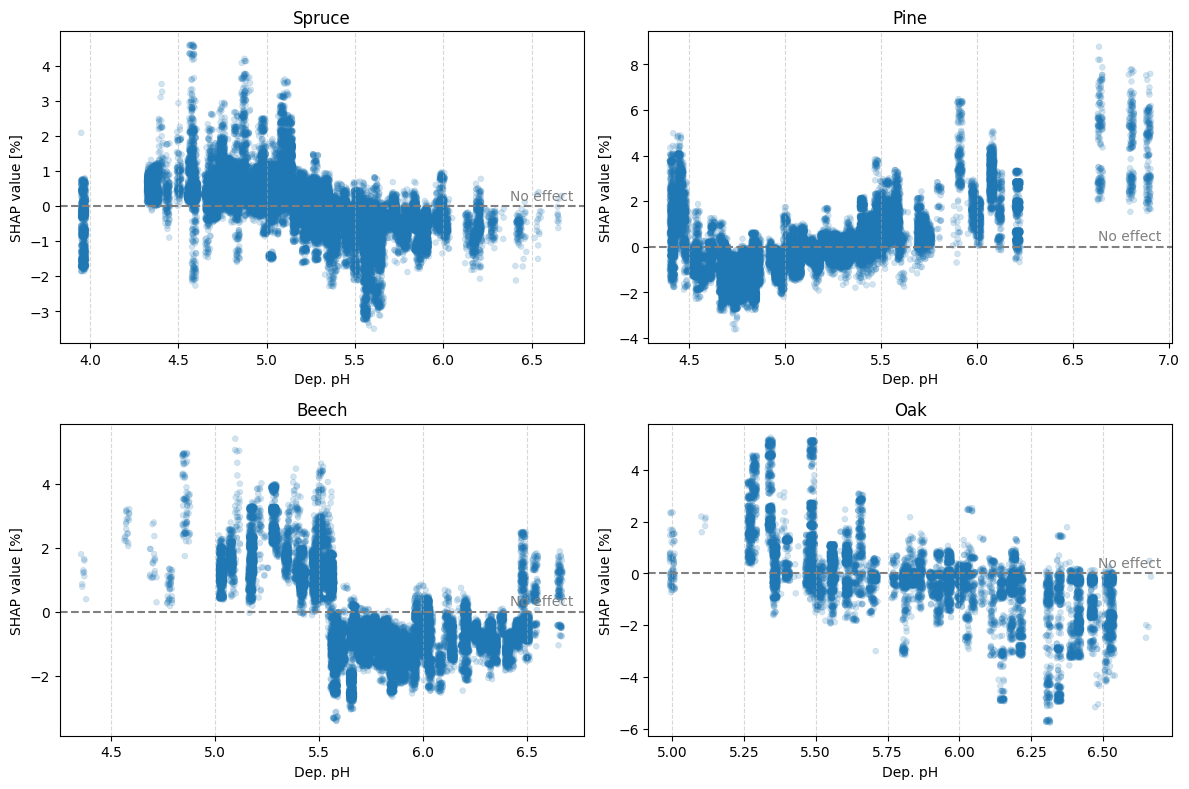

In [34]:
# One plot per species (4 in total)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for species, ax in zip(ALL_SPECIES, axes.flatten()):
    plot_dependence(
        all_results[species],
        feature="dep_ph",
        alpha=0.2,
        ax=ax,
    )

    ax.set_xlabel("Dep. pH")

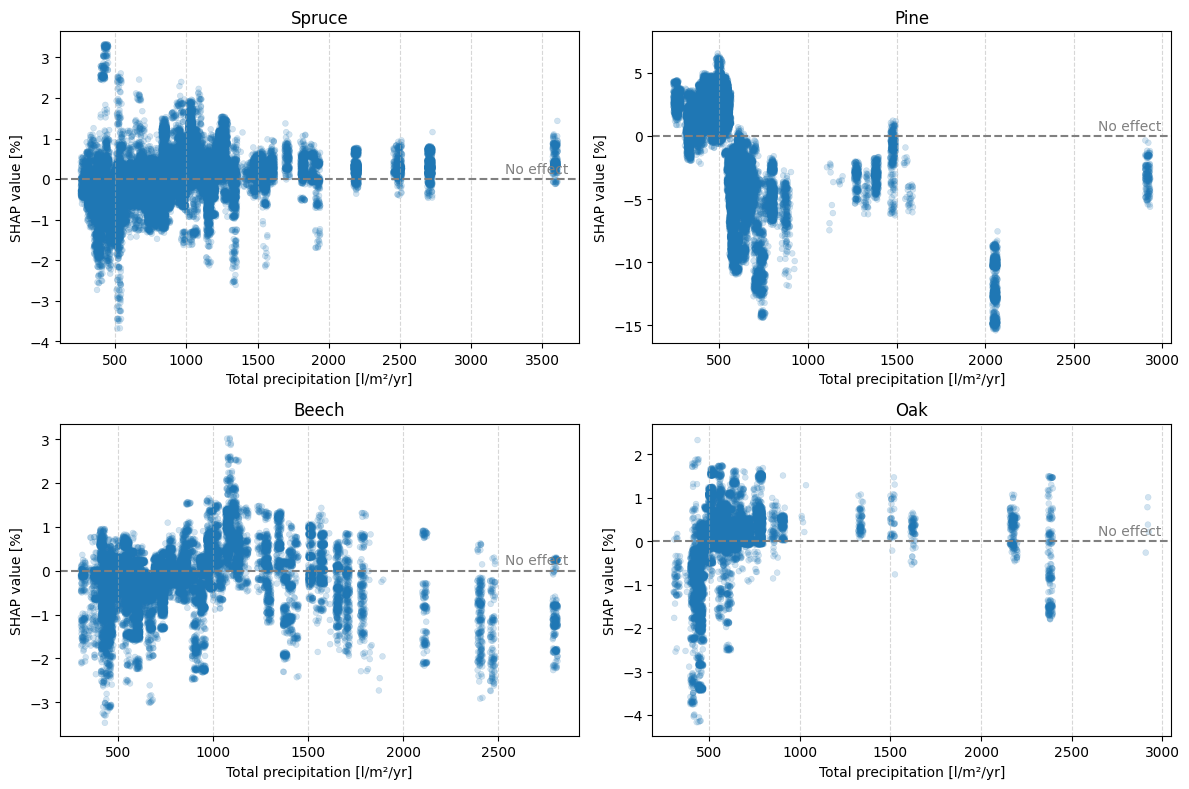

In [35]:
# One plot per species (4 in total)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for species, ax in zip(ALL_SPECIES, axes.flatten()):
    plot_dependence(
        all_results[species],
        feature="yearly_precip",
        alpha=0.2,
        ax=ax,
    )

    ax.set_xlabel("Total precipitation [l/m²/yr]")

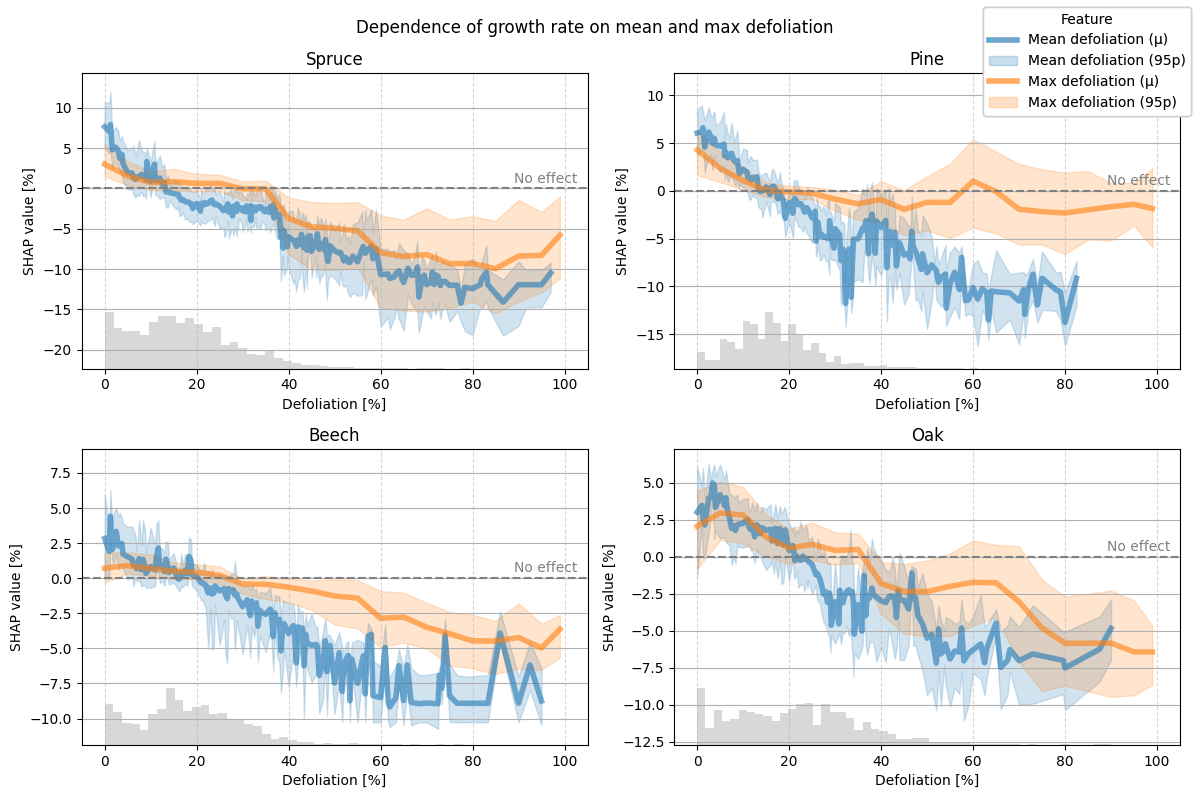

In [36]:
from explain import PlotType

feature = "defoliation_mean"  # Change this to the feature you want to plot

fit_curve = False
fold = 0

# One plot per species (4 in total)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for species, ax in zip(ALL_SPECIES, axes.flatten()):
    ax.grid(True)

    plot_dependence(
        all_results[species],
        feature=feature,
        ax=ax,
        # alpha=0.1,
        xlim=(0, 100),
        plot_type=PlotType.LINE,
        linewidth=4.0,
        show_no_effect=False,
        # ylim=(-0.15, 0.15),
        # color=all_results[species].shap_values[fold][:, "dep_ph"].values
    )

    plot_dependence(
        all_results[species],
        feature="defoliation_max",
        ax=ax,
        xlim=(0, 100),
        color="#ff7f0e",
        plot_type=PlotType.LINE,
        linewidth=4.0,
        show_no_effect=False,
        # ylim=(-0.15, 0.15),
        # color=all_results[species].shap_values[fold][:, "dep_ph"].values
    )

    plot_dependence(
        all_results[species],
        feature="defoliation_mean",
        ax=ax,
        xlim=(0, 100),
        plot_type=PlotType.DENSITY,
        # ylim=(-0.15, 0.15),
        # color=all_results[species].shap_values[fold][:, "dep_ph"].values
    )

    ax.set_title(species.capitalize())
    ax.set_xlabel("Defoliation [%]")
    ax.set_ylabel("SHAP value [%]")

    fig.legend(
        title="Feature",
        labels=[
            "Mean defoliation (μ)",
            "Mean defoliation (95p)",
            "Max defoliation (μ)",
            "Max defoliation (95p)",
        ],
    )

    fig.suptitle("Dependence of growth rate on mean and max defoliation")

plt.tight_layout()

/var/folders/8w/bgtq_bb95_bgd7nxmt9xj04h0000gn/T/ipykernel_24678/3713752728.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


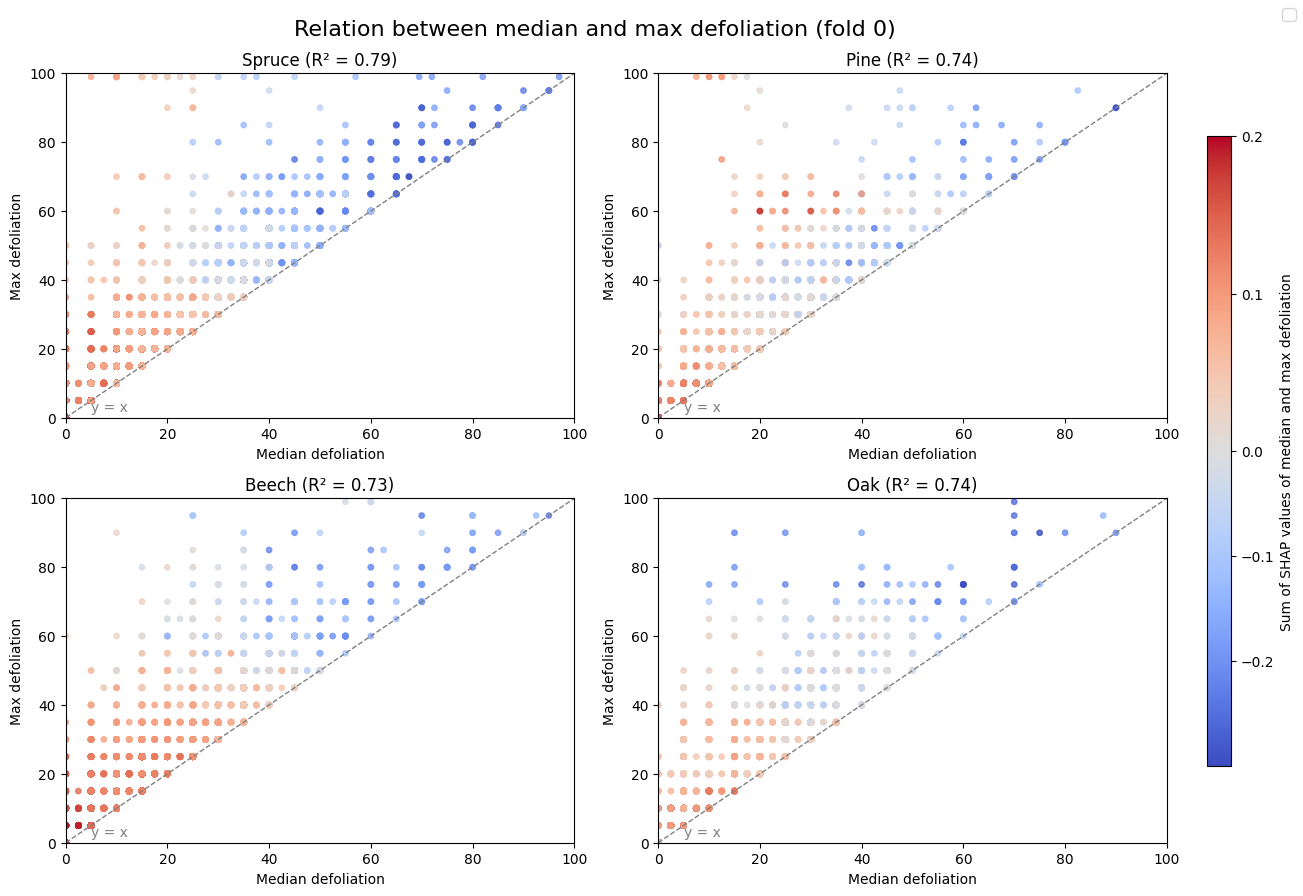

In [37]:
from matplotlib.colors import TwoSlopeNorm
import matplotlib.cm as cm

# Overlay both mean and max defoliation on the same plot
fold = 0

# One plot per species (4 in total)
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

handles, labels = [], []
for species, ax in zip(ALL_SPECIES, axes.flatten()):
    data = all_results[species].get_data(fold=fold, split="all")[0]

    # Draw x = y line and a label
    ax.plot(
        [0, 100],
        [0, 100],
        color="grey",
        linestyle="--",
        linewidth=1,
    )
    ax.text(
        5,
        5,
        "y = x",
        color="grey",
        fontsize=10,
        ha="left",
        va="top",
    )

    # Plot mean vs max defoliation colored by Shapley values of both
    shap_values = (
        all_results[species].shap_values[fold][:, "defoliation_median"].values
        + all_results[species].shap_values[fold][:, "defoliation_max"].values
    )

    # Use coolwarm colormap for better visibility
    norm = TwoSlopeNorm(vmin=-0.30, vcenter=0, vmax=0.2)
    cmap = plt.get_cmap("coolwarm")
    colors = cmap(norm(shap_values))

    ax.scatter(
        data["defoliation_median"].to_numpy(),
        data["defoliation_max"].to_numpy(),
        # label="Mean defoliation",
        c=shap_values,
        alpha=0.8,
        s=15,
        cmap=cmap,
    )

    ax.set_xlabel("Median defoliation")
    ax.set_ylabel("Max defoliation")
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    # Compute R2 between mean and max defoliation
    r2 = (
        np.corrcoef(
            data["defoliation_median"].to_numpy(),
            data["defoliation_max"].to_numpy(),
        )[0, 1]
        ** 2
    )

    # Set the title with R2 value
    ax.set_title(
        f"{species.capitalize()} (R² = {r2:.2f})",
        fontsize=12,
    )

# Display colorbar
fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=axes,
    # Draw the colorbar on the right side of the plot
    cax=fig.add_axes([1.01, 0.15, 0.02, 0.7]),
    label="Sum of SHAP values of median and max defoliation",
    orientation="vertical",
    use_gridspec=True,
)

# Set font size for the legend
fig.legend(handles, labels, fontsize=12)
fig.suptitle(
    f"Relation between median and max defoliation (fold {fold})",
    fontsize=16,
)

plt.tight_layout()

# Species-specific plots

Hereafter we investigate a specific species and feature.

In [38]:
species: Species = "spruce"
results = all_results[species]

## Feature interactions

We visualize the interaction between features by plotting two features against one each other.

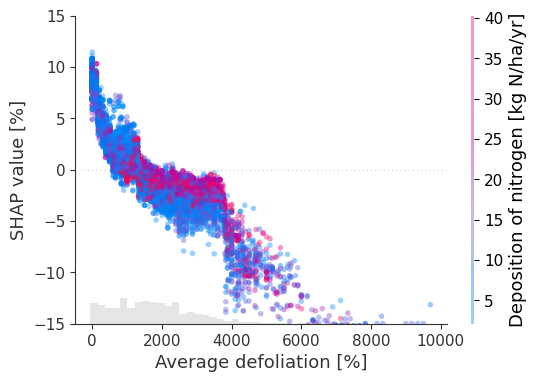

In [39]:
feature = "defoliation_mean"  # Feature to plot
interacting = "dep_n_tot"

# Construct a DataFrame of the interaction values
feature_idx = results.X.columns.index(feature)

# Set axes
fig, ax = plt.figure(figsize=(6, 4)), plt.gca()

# Plot dependence plot with specific interaction
shap.plots.scatter(
    results.shap_values[fold][:, feature] * 100,
    color=results.shap_values[fold][:, interacting],
    alpha=0.4,
    ax=ax,
    show=False,
)
plt.ylim(-15, 15)
plt.xlabel("Average defoliation [%]")
plt.ylabel("SHAP value [%]")

# Set label of colorbar
ax.collections[0].colorbar.set_label("Deposition of nitrogen [kg N/ha/yr]")

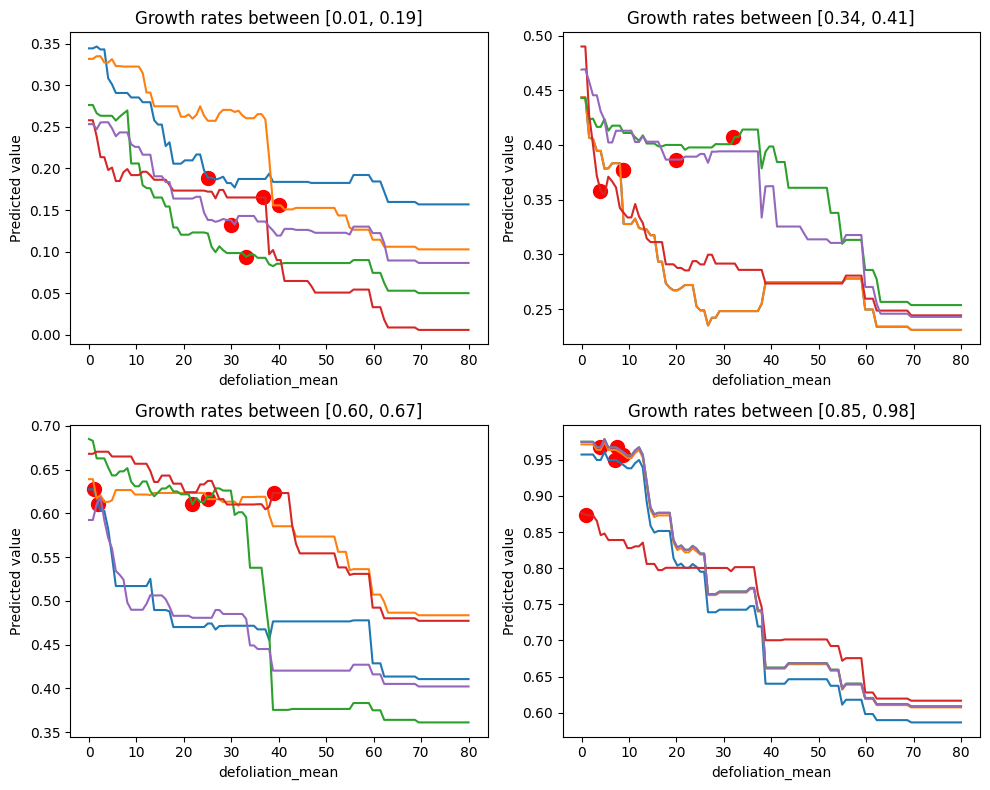

In [40]:
from explain import plot_ceteris_paribus_profile

fold = 0

X, _, y_pred = results.get_data(fold, "test")

# Plot 4 profiles for the selected feature
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

y_vec = y_pred.to_numpy()

for i, ax in enumerate(axes.flat):
    if i == 0:
        # Take 5 growth rates in the 5th percentile
        low, high = np.min(y_vec), np.percentile(y_vec, 5)
    elif i == 1:
        # Take 5 growth rates in the [20, 30] percentile
        low, high = (
            np.percentile(y_vec, 20),
            np.percentile(y_vec, 35),
        )
    elif i == 2:
        # Take 5 growth rates in the [70, 80] percentile
        low, high = (
            np.percentile(y_vec, 70),
            np.percentile(y_vec, 80),
        )
    else:
        # Take 5 growth rates in the 95th percentile
        low, high = np.percentile(y_vec, 95), np.max(y_vec)

    plot_period_indices = np.random.choice(
        np.argwhere((y_vec >= low) & (y_vec < high)).flatten(),
        5,
    )
    title = f"Growth rates between [{low:.2f}, {high:.2f}]"

    for idx in plot_period_indices:
        feature_range, y_pred = plot_ceteris_paribus_profile(
            results.estimators[fold], X, idx, feature, ax=ax
        )
    ax.set_title(title)
    # ax.set_ylim([0.2, 0.8])

plt.tight_layout()

In [41]:
# Build a dataframe of shapley values across all species
df_shap = []
species_col = []
plot_id_col = []
tree_id_col = []

for species, results in all_results.items():
    for fold in range(5):
        df_shap.append(results.shap_values[fold].values)
        species_col.extend([species] * len(df_shap[-1]))
        plot_id_col.extend(results.metadata["plot_id"].to_numpy())
        tree_id_col.extend(results.metadata["tree_id"].to_numpy())

# Build a dataframe of SHAP values, downsampled to 2000 samples
df_shap = (
    pl.from_numpy(np.concatenate(df_shap, axis=0), schema=results.features)
    .with_columns(
        pl.Series("species", species_col),
        pl.Series("plot_id", plot_id_col),
        pl.Series("tree_id", tree_id_col),
    )
    .select(
        "species",
        "plot_id",
        "tree_id",
        pl.concat_arr(cs.exclude("species", "plot_id", "tree_id").alias("shap")),
    )
    .sample(n=2000)
)

In [42]:
# Ensure fixed-size array (set D to your dimension)
D = 63  # example

# Break vector into scalar components
comp_cols = [pl.col("shap").arr.get(i).alias(f"c{i}") for i in range(D)]

dfc = df_shap.with_columns(comp_cols).with_columns(
    sq_norm=sum(pl.col(f"c{i}") ** 2 for i in range(D))
)

# Global aggregates
glob = dfc.select(
    n=pl.len(),
    S2=pl.col("sq_norm").sum(),
    **{f"S1_{i}": pl.col(f"c{i}").sum() for i in range(D)},
)

# Per-cluster aggregates
per = dfc.group_by("plot_id").agg(
    n_k=pl.len(),
    S2_k=pl.col("sq_norm").sum(),
    **{f"S1k_{i}": pl.col(f"c{i}").sum() for i in range(D)},
)

# Compute ||S1||^2 globally
glob = glob.with_columns(S1_sq=sum(pl.col(f"S1_{i}") ** 2 for i in range(D))).select(
    "n", "S2", "S1_sq"
)

# Compute per-cluster T_k = n_k*S2_k - ||S1_k||^2 and pair counts
per = (
    per.with_columns(S1k_sq=sum(pl.col(f"S1k_{i}") ** 2 for i in range(D)))
    .with_columns(
        T_k=pl.col("n_k") * pl.col("S2_k") - pl.col("S1k_sq"),
        P_k=(pl.col("n_k") * (pl.col("n_k") - 1)) / 2,
    )
    .select("plot_id", "n_k", "T_k", "P_k")
)

# Scalar reductions
scalars = (
    per.select(
        T_intra=pl.col("T_k").sum(),
        P_intra=pl.col("P_k").sum(),
        n=pl.lit(glob.item(0, "n")),
        S2=pl.lit(glob.item(0, "S2")),
        S1_sq=pl.lit(glob.item(0, "S1_sq")),
    )
    .with_columns(
        P_all=(pl.col("n") * (pl.col("n") - 1)) / 2,
        T_all=pl.col("n") * pl.col("S2") - pl.col("S1_sq"),
    )
    .with_columns(
        T_inter=pl.col("T_all") - pl.col("T_intra"),
        P_inter=pl.col("P_all") - pl.col("P_intra"),
    )
    .with_columns(
        rms_intra=(pl.col("T_intra") / pl.col("P_intra")).sqrt(),
        rms_inter=(pl.col("T_inter") / pl.col("P_inter")).sqrt(),
    )
    .with_columns(clusterness=pl.col("rms_intra") / pl.col("rms_inter"))
)

# Extract results
scalars.select("rms_intra", "rms_inter", "clusterness")

rms_intra,rms_inter,clusterness
f64,f64,f64
0.103775,0.140726,0.737425


In [43]:
# Visualize Shapley values using t-SNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


# Standardize the data
scaler = StandardScaler()
X_shap = np.nan_to_num(scaler.fit_transform(df_shap["shap"].to_numpy()))

# Train the t-SNE model
tsne = TSNE(n_components=2, perplexity=100, early_exaggeration=20)
X_tsne = tsne.fit_transform(X_shap)

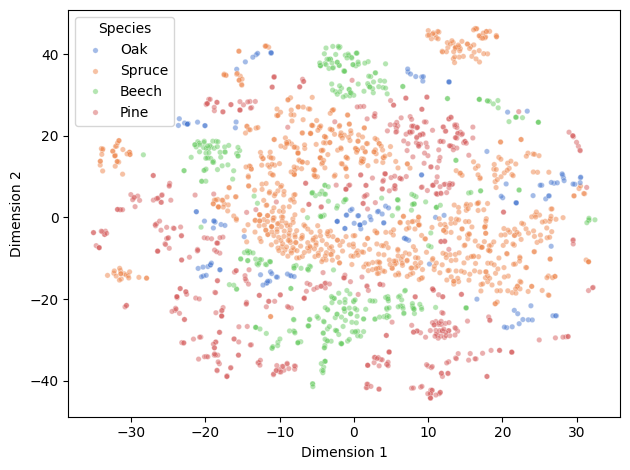

In [44]:
# Use seaborn to generate a scatter plot of the t-SNE results
ax = sns.scatterplot(
    data=df_shap.with_columns(
        pl.Series("tsne_x", X_tsne[:, 0]), pl.Series("tsne_y", X_tsne[:, 1])
    ).to_pandas(),
    x="tsne_x",
    y="tsne_y",
    hue="species",
    alpha=0.5,
    palette="muted",
    s=15,
    legend="brief",
)

ax.legend_.set_title("Species")

# Capitalize legend labels
new_labels = [label.get_text().capitalize() for label in ax.legend_.texts[0:]]
for label, new_text in zip(ax.legend_.texts[0:], new_labels):
    label.set_text(new_text)

ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")

plt.tight_layout()

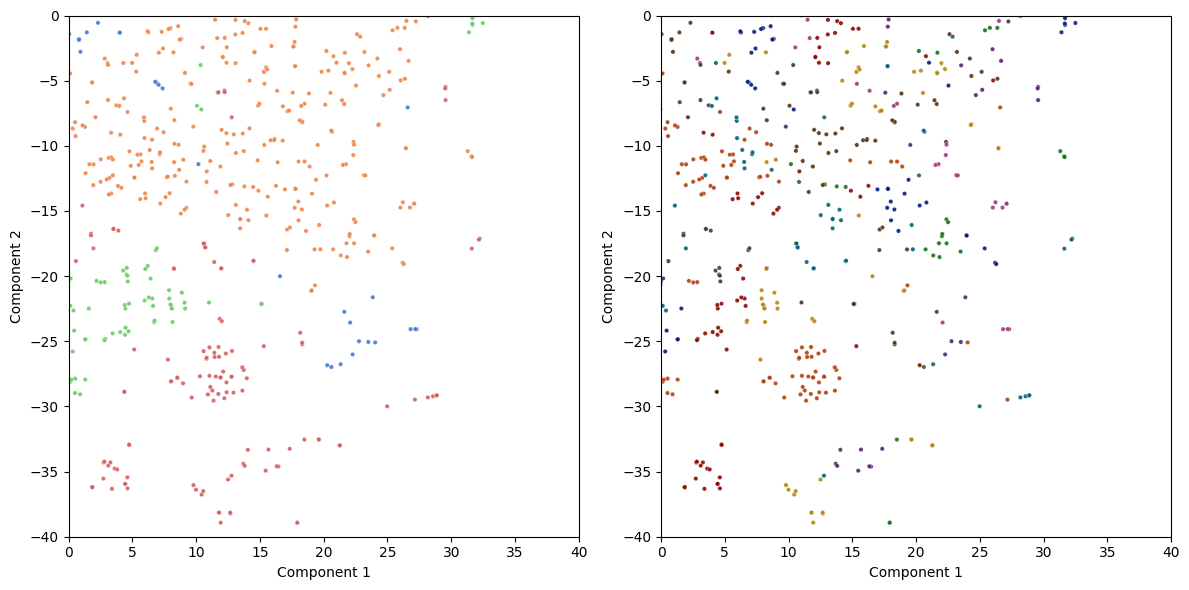

In [45]:
# Produce a zoom in a specific region
x_bounds = [0, 40]
y_bounds = [-40, 0]

# Create 2 subplots of the zoomed region: one for the species and one for the plot_id

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, col in zip(axes, ["species", "plot_id"]):
    sns.scatterplot(
        data=df_shap.with_columns(
            pl.Series("tsne_x", X_tsne[:, 0]), pl.Series("tsne_y", X_tsne[:, 1])
        ).to_pandas(),
        x="tsne_x",
        y="tsne_y",
        hue=col,
        alpha=0.9,
        palette="muted" if col == "species" else "dark",
        legend=False,
        s=10,
        ax=ax,
    )

    ax.set_xlim(x_bounds)
    ax.set_ylim(y_bounds)

    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")

    plt.tight_layout()

## Feature interactions

We can compute the Shapley interactions using `get_shap_interactions`, which returns a tensor `(# samples, # features, # features)`, where each slice along the first axis is a symmetric matrix of interaction values, whose each row sums to the Shapley value for this feature. The diagonal entries represent the "main effect" attributed to that feature, whereas other entires represent the first-order interactions with every other feature.

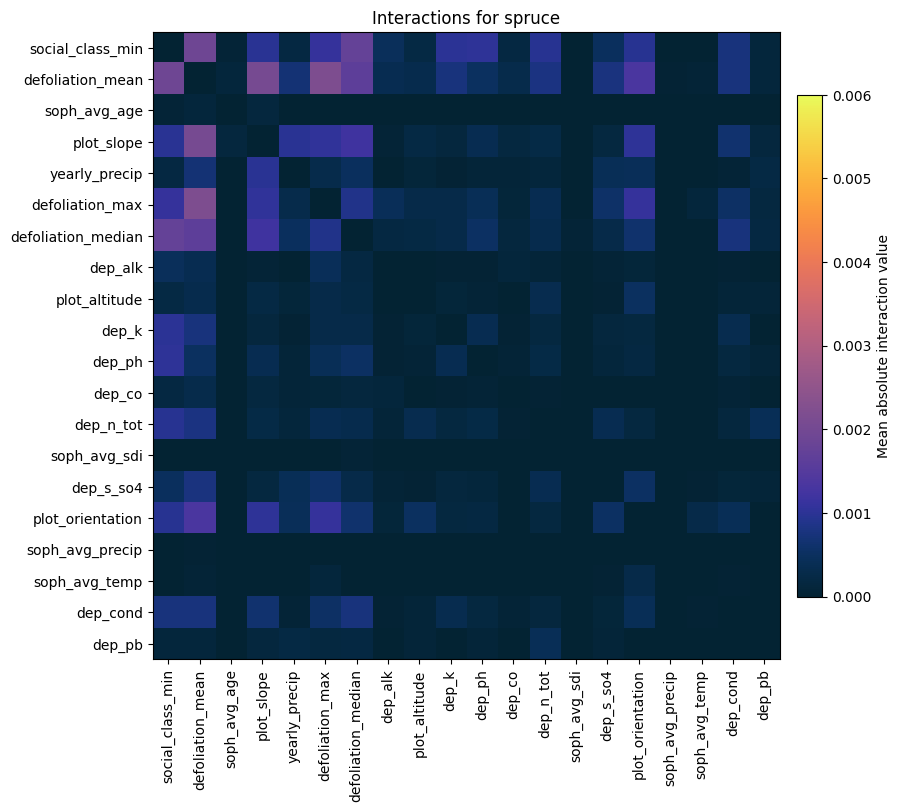

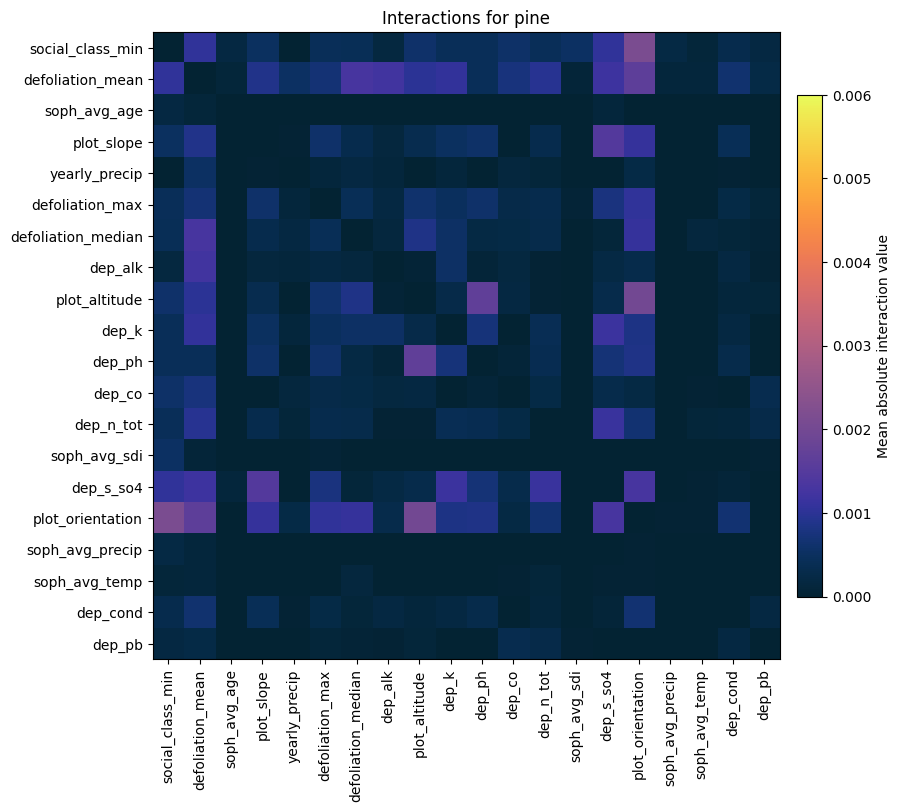

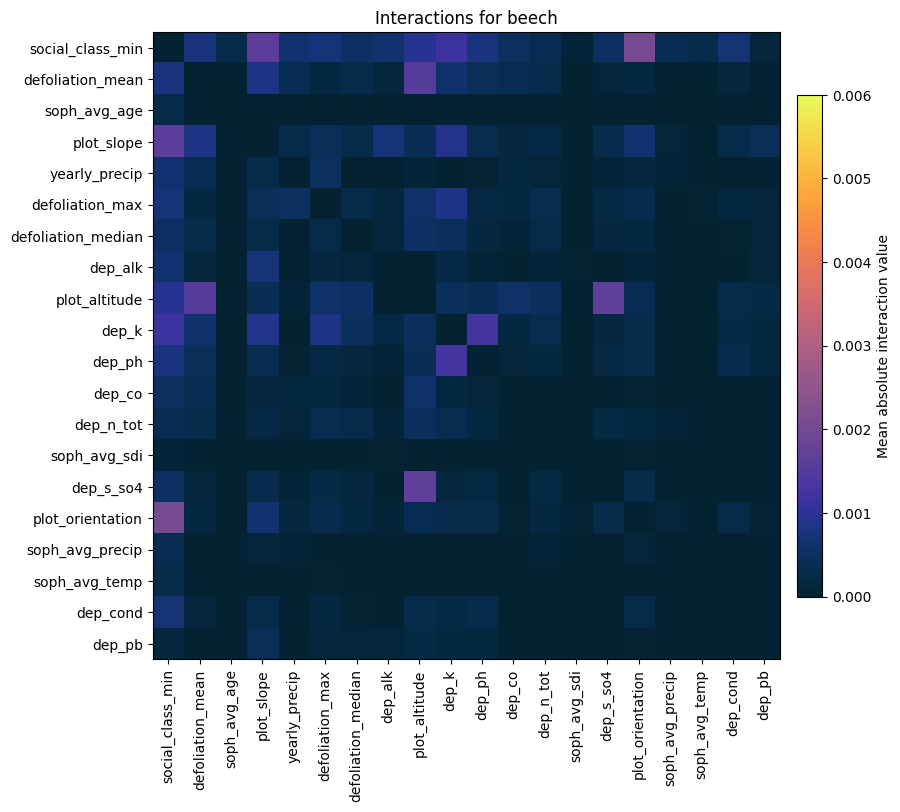

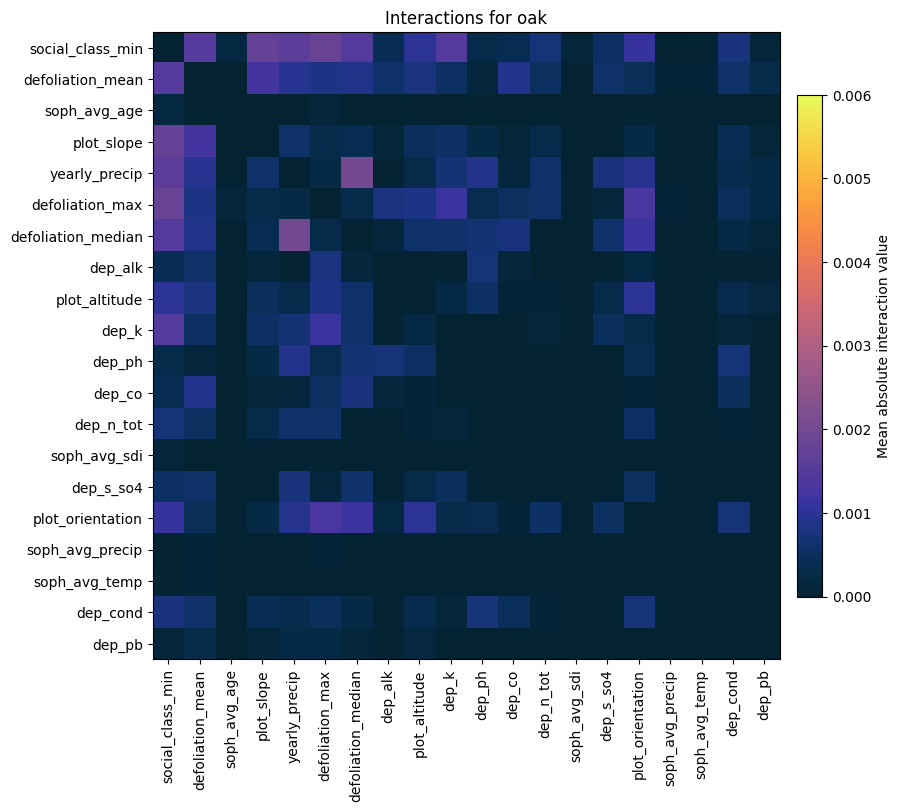

In [46]:
from explain import compute_interaction_matrix

top_n_features = (
    feature_importances.select(
        "feature", pl.col("shap").mean().over("feature").alias("importance")
    )
    .unique()
    .sort("importance", descending=True)
    .head(20)["feature"]
    .to_list()
)

interactions = {}
indices = {}

# Loop over the species
for species in ALL_SPECIES:
    results = all_results[species]

    # Plot the mean absolute interaction values for the selected feature as a heatmap
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    interactions[species], indices[species] = compute_interaction_matrix(
        results, top_n=top_n_features, ax=ax, vmax=0.006
    )

    plt.tight_layout()
    plt.title(f"Interactions for {species}")

    plt.savefig(f"figures/{species}-interactions-mean.png")

In [47]:
import networkx as nx

# Find all pair of features with a significant interaction
species = "oak"
cutoff = 0.002

results = all_results[species]
interactions_matrix = interactions[species]

interactions_matrix = np.absolute(interactions_matrix).mean(axis=0)
adjacency_matrix = np.triu(interactions_matrix, k=1)
adjacency_matrix[adjacency_matrix < cutoff] = 0.0

# Build graph from adjacency matrix
G = cast(
    nx.Graph,
    nx.from_numpy_array(
        adjacency_matrix,
        edge_attr="interaction",
        nodelist=results.features,
    ),
)

# Trim nodes without any connection
G.remove_nodes_from(list(nx.isolates(G)))

# Display graph with a circular layout
plt.figure(figsize=(12, 12))
pos = nx.circular_layout(G)

# Draw edges with a width proportional to the interaction strength
nx.draw_networkx_edges(
    G, pos, width=[G[u][v]["interaction"] * 1000 for u, v in G.edges()]
)

# Draw labels for the edges up in scientific notation with 2 decimal places
edge_labels = {
    k: f"{v:.2e}" for k, v in nx.get_edge_attributes(G, "interaction").items()
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw labels for the nodes while avoiding overlap
nx.draw_networkx_labels(
    G,
    pos,
    font_size=12,
    font_color="black",
    bbox=dict(facecolor="lightblue", boxstyle="round,pad=0.5,rounding_size=0.5"),
)
plt.title(f"Interaction graph for {species}")

ValueError: nodelist must have the same length as A.shape[0]